## **First Look**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/Users/Marcy_Student/Desktop/Marcy-Modules/Mod6/final-project/data/Motor_Vehicle_Collisions_-_Crashes_20251208.csv'

df = pd.read_csv(path, parse_dates=['CRASH DATE'])
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2022-01-01,7:33,NaN,NaN,40.771477,-73.918240,"(40.771477, -73.91824)",HOYT AVENUE NORTH,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4491400,Sedan,NaN,NaN,NaN,NaN
1,2022-01-01,4:30,NaN,NaN,NaN,NaN,NaN,Southern parkway,Jfk expressway,NaN,...,Unspecified,NaN,NaN,NaN,4491626,Sedan,Sedan,NaN,NaN,NaN
2,2022-01-01,7:57,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,SHERIDAN EXPRESSWAY,NaN,...,NaN,NaN,NaN,NaN,4491734,Sedan,NaN,NaN,NaN,NaN
3,2022-01-01,5:17,NaN,NaN,40.746930,-73.848660,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,NaN,NaN,...,Unsafe Lane Changing,NaN,NaN,NaN,4491857,Sedan,Sedan,NaN,NaN,NaN
4,2022-01-01,1:30,NaN,NaN,40.819157,-73.960380,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4491344,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,2025-12-02,10:38,BRONX,10475.0,40.884712,-73.831300,"(40.884712, -73.8313)",DYRE AVE,BOSTON RD,NaN,...,NaN,NaN,NaN,NaN,4861707,Sedan,NaN,NaN,NaN,NaN
369997,2025-12-02,19:05,BRONX,10451.0,40.814716,-73.922070,"(40.814716, -73.92207)",NaN,NaN,328 E 145 ST,...,Unspecified,NaN,NaN,NaN,4861762,Sedan,Sedan,NaN,NaN,NaN
369998,2025-12-02,20:21,BROOKLYN,11219.0,40.639004,-74.000400,"(40.639004, -74.0004)",NaN,NaN,948 50 ST,...,NaN,NaN,NaN,NaN,4861807,Sedan,NaN,NaN,NaN,NaN
369999,2025-12-02,5:50,NaN,NaN,40.709960,-73.989334,"(40.70996, -73.989334)",FDR DRIVE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4861697,Sedan,NaN,NaN,NaN,NaN


# Cleaning

In [3]:
# cleaning column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')

In [4]:
print("------------------ Total NaNs per Column -------------------")
display(df.isna().sum())
print("------------------ Column Types -------------------")
display(df.dtypes)

------------------ Total NaNs per Column -------------------


crash_date                            0
crash_time                            0
borough                          107666
zip_code                         107718
latitude                          24170
longitude                         24170
location                          24170
on_street_name                   105048
cross_street_name                180849
off_street_name                  264957
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
contributing_factor_vehicle_1      2492
contributing_factor_vehicle_2     87627
contributing_factor_vehicle_3    336544
contributing_factor_vehicle_4    361202
contributing_factor_vehicle_5    367372
collision_id                          0
vehicle_type_code_1                5943


------------------ Column Types -------------------


crash_date                       datetime64[ns]
crash_time                               object
borough                                  object
zip_code                                float64
latitude                                float64
longitude                               float64
location                                 object
on_street_name                           object
cross_street_name                        object
off_street_name                          object
number_of_persons_injured                 int64
number_of_persons_killed                  int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
contributing_factor_vehicle_3           

# Feature Engineering

In [ ]:
# new column: month
df['month'] = df['crash_date'].dt.month
df['month'].value_counts()

month
5     34287
6     33118
10    32979
9     32553
7     32029
3     31930
8     31563
4     30401
11    30328
1     29361
2     27091
12    24361
Name: count, dtype: int64

In [16]:
list(range(6))

[0, 1, 2, 3, 4, 5]

In [37]:
# new column: season

season = []

for x in df['month']:
    if x in [12,1,2]:
        season.append('Winter')
    elif x in [3,4,5]:
        season.append('Spring')
    elif x in [6,7,8]:
        season.append('Summer')
    elif x in [9,10,11]:
        season.append('Fall')
    else:
        season.append('Error')

df['season'] = season
df['season'].value_counts()

season
Summer    96710
Spring    96618
Fall      95860
Winter    80813
Name: count, dtype: int64

# EDA

In [58]:
df[:,10:]

InvalidIndexError: (slice(None, None, None), slice(10, None, None))

In [41]:
# total number of people injured from motor vehicle collisions
print(df['number_of_persons_injured'].sum())
display(df['number_of_persons_injured'].value_counts())

205869


number_of_persons_injured
0     216375
1     120031
2      22283
3       7219
4       2501
5        901
6        370
7        140
8         71
9         28
10        25
11        15
13        11
15        10
12         7
14         3
17         3
20         2
40         1
21         1
23         1
34         1
18         1
25         1
Name: count, dtype: int64

/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_77613/2498645374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(df, x='season', y='number_of_persons_injured', palette='pastel', estimator='sum')


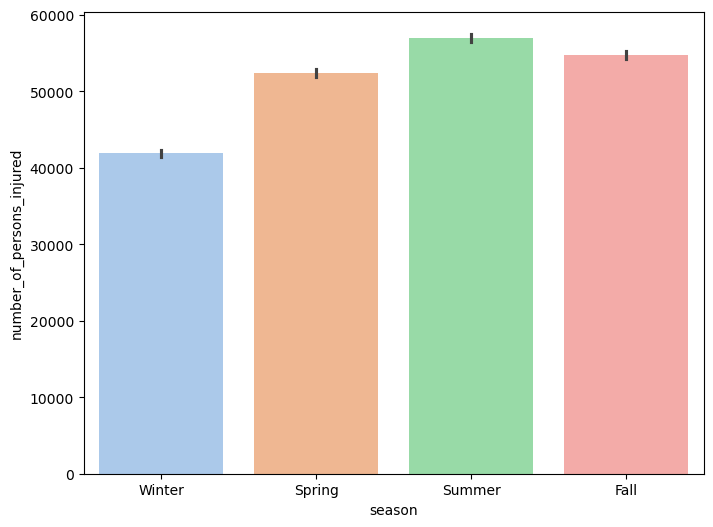

In [ ]:
plt.figure(figsize=[8,6])
ax = sns.barplot(df, x='season', y='number_of_persons_injured', palette='pastel', estimator='sum')